In [ ]:
#Ejemplo básico de NPL de: https://likegeeks.com/es/tutorial-de-nlp-con-python-nltk/
#Extracción y análisis de palabras en una página web. 
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Primero, tomaremos el contenido de una página web y luego analizaremos el texto para ver de qué se trata la página.

import urllib.request #módulo urllib para rastrear la página web:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
print (html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

In [ ]:
#Como vemos en la salida impreta el resultado contiene muchas etiquetas HTML que deben limpiarse.
#Esto me sirve más adelante para reutilizar el data sets de cvs de indeed. 

#Usamos BeautifulSoup para limpiar el texto capturado:

from bs4 import BeautifulSoup
import urllib.request
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
print (text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

In [ ]:
#Ahora tenemos el texto limpio de la página web rastreada.
#Finalmente, convirtamos ese texto en tokens dividiendo el texto de esta manera:

from bs4 import BeautifulSoup
import urllib.request

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
tokens = [t for t in text.split()]
print (tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

In [ ]:
#Podemos contar la frecuencia de palabras. Ahora vamos a calcular la distribución de frecuencia de esos tokens usando Python NLTK.
#La función de NLTK llamada FreqDist() hace ese trabajo.

from bs4 import BeautifulSoup
import urllib.request
import nltk

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
tokens = [t for t in text.split()]
#Contamos la frecuencia:
freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))


PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:102
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:2
CGI:1
binaryInstalled:1
an:14
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:3
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAf

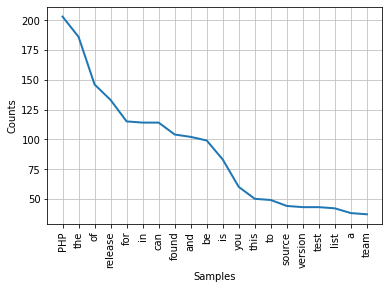

In [ ]:
#Si buscamos el resultado, vemos que el token más frecuente es PHP con 203.

#Podemos elaborar un gráfico para esos tokens usando una función como esta:
freq.plot(20, cumulative=False)

#Viendo el gráfico, podemos estar seguros de que este artículo está hablando de PHP.
#Hay algunas palabras como The, Of, a, an, y así sucesivamente. Estas palabras son palabras de parada (stop words).
#En general, se deben eliminar las palabras de parada para evitar que afecten a nuestros resultados.

In [ ]:
#Eliminar palabras de parada con NLTK:
#NLTK contiene listas de palabras prohibidas para la mayoría de los idiomas. Para obtener las palabras de parada en inglés, puedes usar este código:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Ahora, modifiquemos nuestro código para trazar un nuevo gráfico.
#Primero, hacemos una copia de la lista, luego iteraramos sobre los tokens y eliminamos las stop words:
clean_tokens = tokens[:]
sr = stopwords.words('english')

for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)


In [ ]:
#ACódigo final:

from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
tokens = [t for t in text.split()]
clean_tokens = tokens[:]
sr = stopwords.words('english')

for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

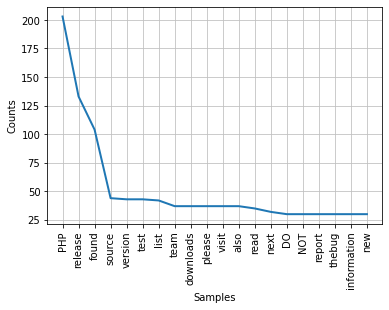

In [ ]:
#Realizamos el nuevo gráfico sin las stop words:
freq.plot(20,cumulative=False)

In [ ]:
#Ahora vamos a tokenizar texto usando NLTK:
#Antes realizamos un split del texto, pero la mejor forma de convertir el texto en tokens es utilizando las funciones de NLTK. 
#Tokenizar el texto es importante ya que el texto no se puede procesar sin tokenizarlo. El proceso de tokenización significa dividir partes más grandes en partes pequeñas.
#Puedes convertir párrafos en oraciones y confeccionar frases en palabras según tus necesidades. NLTK contiene un tokenizador de frase y un tokenizador de palabra.

#Supongamos que tenemos un texto de muestra como el siguiente: "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude."

#Tokenizamos este texto en ORACIONES usando sent_tokenize():
from nltk.tokenize import sent_tokenize
mytext = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(sent_tokenize(mytext))

['Hello Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


In [ ]:
#Podríamos considerar NO usar el tokenizador de NLTK y seguir haciendolo con el split y cuando vemos que hay un punto, coma o espacio dividimos oraciones utilizando expresiones regulares. 
#Peeero hay casos donde un punto por ej. NO significa esto. Por ej. aca tenemos un Mr. donde este punto NO es un punto:
from nltk.tokenize import sent_tokenize
mytext2 = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(sent_tokenize(mytext2))

#Y vemos que tokeniza el texto correctamente. 

['Hello Mr. Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


In [ ]:
#Ahora vamos a utilizar la función word_tokenize para separar por PALABRAS (NO por ORACIONES):

from nltk.tokenize import word_tokenize
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(word_tokenize(mytext))

#Vemos que el tokenizador resolvió correctamente, la palabra Mr. es una palabra como se esperaba.
#NLTK usa PunktSentenceTokenizer, que es parte del módulo nltk.tokenize.punkt.
#Este tokenizer se entrenó bien para trabajar con muchos idiomas.

['Hello', 'Mr.', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',', 'see', 'you', 'dude', '.']


In [ ]:
#Tokenizamos ahora textos que no están en inglés. Para hacer esto podemos especificar el idioma de esta manera:

from nltk.tokenize import sent_tokenize
mytext = "Bonjour M. Adam, comment allez-vous? J'espère que tout va bien. Aujourd'hui est un bon jour."
print(sent_tokenize(mytext,"french"))

['Bonjour M. Adam, comment allez-vous?', "J'espère que tout va bien.", "Aujourd'hui est un bon jour."]


In [ ]:
#Tambien podemos por ej. obtener sinónimos mediante el paquete WordNet de nltk:
#WordNet es una base de datos creada para el procesamiento del lenguaje natural. Incluye grupos de sinónimos y una breve definición.

#Podemos obtener definiciones de las palabras y ejemplos de uso para una palabra dada como esta:
from nltk.corpus import wordnet
syn = wordnet.synsets("pain")
print(syn[0].definition())
print(syn[0].examples())

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


In [ ]:
#Tambien podemos usar WordNet para obtener palabras sinónimo:

from nltk.corpus import wordnet

synonyms = []
for syn in wordnet.synsets('Computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())

print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']
